In [1]:
from model import DESModel
from openclsim.plot import get_log_dataframe
import numpy as np
import datetime as dt
from tqdm.notebook import tqdm
import pandas as pd

In [2]:
m = DESModel()
m.resources(kind="allowable_sea_state")
m.processes()
m.start_simulation()

m1 = DESModel()
m1.resources(kind="response_motions")
m1.processes()
m1.start_simulation()

In [3]:
dates = pd.date_range(start=dt.datetime(1990, 1, 1), end=dt.datetime(2019, 1, 1), freq="H")
indices = np.random.randint(0, len(dates), size=10_000)
start_dates = dates[indices] 

In [4]:
results = dict(
    StartDate=start_dates, 
    ProjectDurationRAO=[], 
    DowntimeDurationRAO = [],
    ProjectDurationSea=[],
    DowntimeDurationSea = []
)

for date in tqdm(start_dates):
    m.restart_simulation(start_date=date)
    results["ProjectDurationSea"].append(m.project_length())
    results["DowntimeDurationSea"].append(m.get_downtime())

    m1.restart_simulation(start_date=date)
    results["ProjectDurationRAO"].append(m1.project_length())
    results["DowntimeDurationRAO"].append(m1.get_downtime())

  0%|          | 0/10000 [00:00<?, ?it/s]

In [5]:
df = pd.DataFrame(results)
df["WorkabilityRAO"] = 1 - (df["DowntimeDurationRAO"] / df["ProjectDurationRAO"])
df["ProjectDurationRAO"] = df["ProjectDurationRAO"].dt.total_seconds() / (3600 * 24)

df["WorkabilitySea"] = 1 - (df["DowntimeDurationSea"] / df["ProjectDurationSea"])
df["ProjectDurationSea"] = df["ProjectDurationSea"].dt.total_seconds() / (3600 * 24)
df["Month"] = df["StartDate"].dt.month

<AxesSubplot:xlabel='Month'>

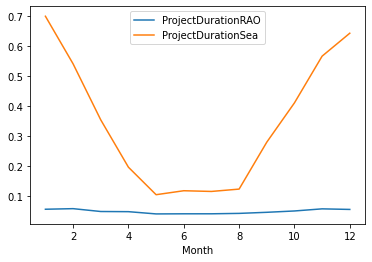

In [6]:
df.groupby("Month")[["ProjectDurationRAO", "ProjectDurationSea"]].mean().plot()